House Price Prediction

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train_data = pd.read_csv('C:/Users/SUSHMITHA/Desktop/Veltris/Code/train.csv')
test_data = pd.read_csv('C:/Users/SUSHMITHA/Desktop/Veltris/Code/test.csv')

In [3]:
np.random.seed(1)

In [4]:
train_data.dtypes.unique().tolist()

[dtype('int64'), dtype('O'), dtype('float64')]

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
NUMERICAL = train_data.select_dtypes(include=['int64', 'float64']).columns
CATEGORICAL = train_data.select_dtypes(include=['O']).columns

In [7]:
NUMERICAL.shape

(38,)

In [8]:
CATEGORICAL.shape

(43,)

In [9]:
CATEGORICAL

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
NUMERICAL

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
NUMERICAL = NUMERICAL.drop(['Id', 'SalePrice'])

In [12]:
NUMERICAL

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [13]:
percent_of_nan = train_data.isna().sum().sort_values(ascending=False) / train_data.shape[0] * 100
percent_of_nan.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [14]:
percent_of_nan.loc[NUMERICAL].sort_values(ascending=False).head(10)

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
WoodDeckSF       0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
dtype: float64

In [15]:
percent_of_nan.loc[CATEGORICAL].sort_values(ascending=False).head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
dtype: float64

In [16]:
CAT_COL_DROP = percent_of_nan[(percent_of_nan.index.isin(CATEGORICAL)) & (percent_of_nan > 6)].index
CATEGORICAL = percent_of_nan[(percent_of_nan.index.isin(CATEGORICAL)) & ~(percent_of_nan > 6)].index

In [17]:
CATEGORICAL.shape

(37,)

In [18]:
train_data[CATEGORICAL]

,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,Electrical,...,MSZoning,CentralAir,Heating,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl
0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,SBrkr,...,RL,Y,GasA,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg
1,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,ALQ,SBrkr,...,RL,Y,GasA,Gable,CBlock,TA,TA,MetalSd,MetalSd,CompShg
2,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,GLQ,SBrkr,...,RL,Y,GasA,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg
3,TA,Detchd,Unf,TA,Unf,No,TA,Gd,ALQ,SBrkr,...,RL,Y,GasA,Gable,BrkTil,TA,TA,Wd Shng,Wd Sdng,CompShg
4,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,GLQ,SBrkr,...,RL,Y,GasA,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Attchd,RFn,TA,Unf,No,Gd,TA,Unf,SBrkr,...,RL,Y,GasA,Gable,PConc,TA,TA,VinylSd,VinylSd,CompShg
1456,TA,Attchd,Unf,TA,Rec,No,Gd,TA,ALQ,SBrkr,...,RL,Y,GasA,Gable,CBlock,TA,TA,Plywood,Plywood,CompShg
1457,TA,Attchd,RFn,TA,Unf,No,TA,Gd,GLQ,SBrkr,...,RL,Y,GasA,Gable,Stone,Gd,Ex,CmentBd,CemntBd,CompShg
1458,TA,Attchd,Unf,TA,Rec,Mn,TA,TA,GLQ,FuseA,...,RL,Y,GasA,Hip,CBlock,TA,TA,MetalSd,MetalSd,CompShg


In [19]:
train_data[CATEGORICAL].shape

(1460, 37)

In [20]:
train_data[CATEGORICAL].apply(lambda col: col.nunique()).sum()

230

In [21]:
train_data[NUMERICAL].shape

(1460, 36)

In [22]:
train_data[CATEGORICAL].isnull().sum()

GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
Electrical        1
Functional        0
KitchenQual       0
PavedDrive        0
SaleType          0
SaleCondition     0
HeatingQC         0
LandSlope         0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0
LotConfig         0
Utilities         0
LandContour       0
LotShape          0
Street            0
MSZoning          0
CentralAir        0
Heating           0
RoofStyle         0
Foundation        0
ExterCond         0
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
dtype: int64

In [23]:
for i in train_data:
    if train_data[i].isnull().sum() and train_data[i].dtypes=='float64':
        train_data[i]=train_data[i].fillna(train_data[i].mean(),inplace=True)

In [24]:
for i in train_data:
    if train_data[i].isnull().sum() > 0:  # Check if there are null values in the column
        mode_values = train_data[i].mode()  # Calculate mode values
        if not mode_values.empty:  # Check if mode calculation is not empty
            mode_value = mode_values.iloc[0]  # Get the first mode value
            train_data[i] = train_data[i].fillna(mode_value)  # Replace null values with mode value


In [25]:
train_data[CATEGORICAL].isnull().sum()

GarageCond       0
GarageType       0
GarageFinish     0
GarageQual       0
BsmtFinType2     0
BsmtExposure     0
BsmtQual         0
BsmtCond         0
BsmtFinType1     0
Electrical       0
Functional       0
KitchenQual      0
PavedDrive       0
SaleType         0
SaleCondition    0
HeatingQC        0
LandSlope        0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
MSZoning         0
CentralAir       0
Heating          0
RoofStyle        0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
dtype: int64

In [26]:
percent_of_nan.loc[NUMERICAL].sort_values(ascending=False).head(10)

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
WoodDeckSF       0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
dtype: float64

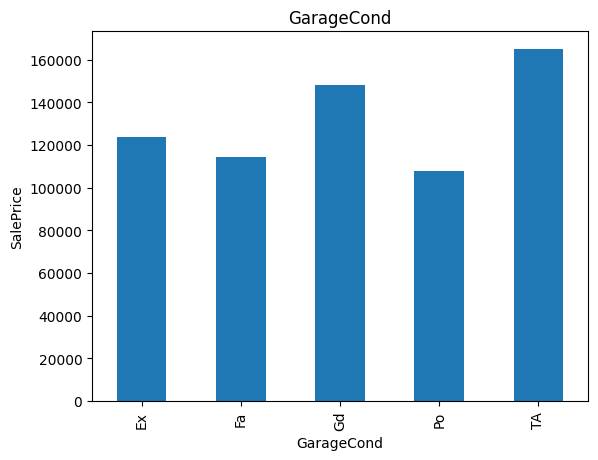

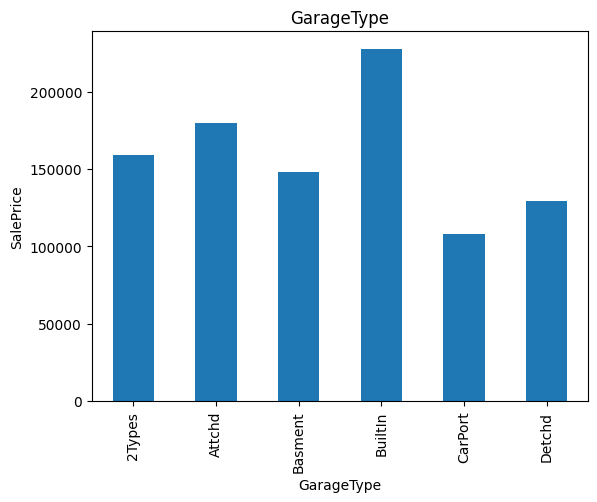

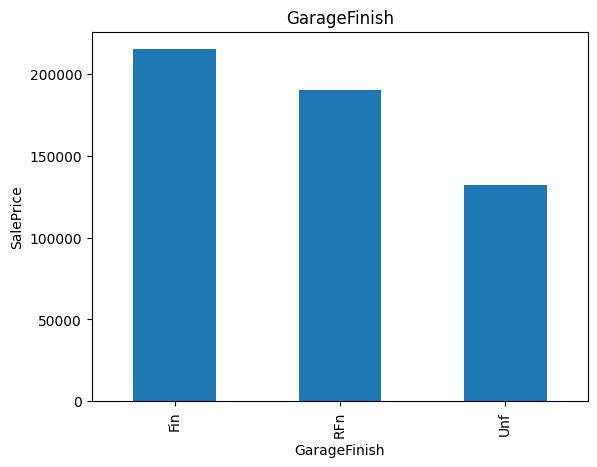

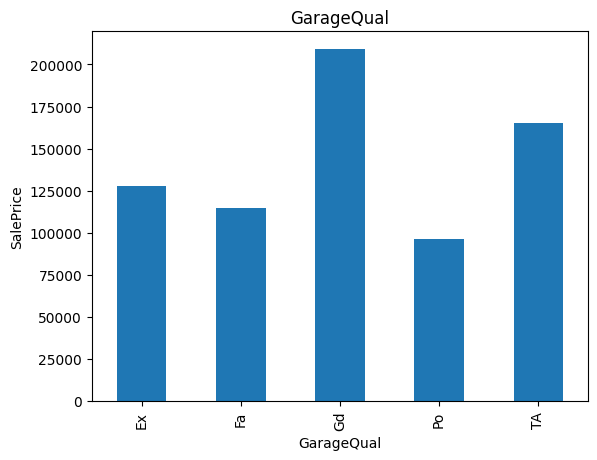

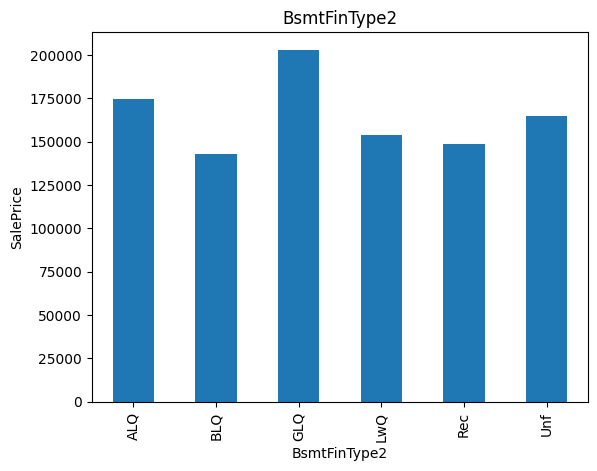

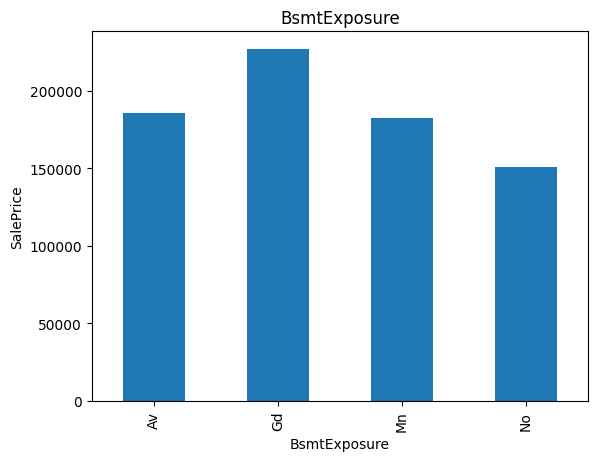

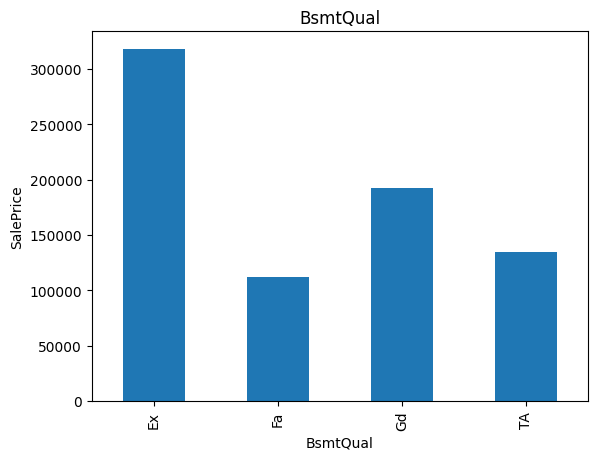

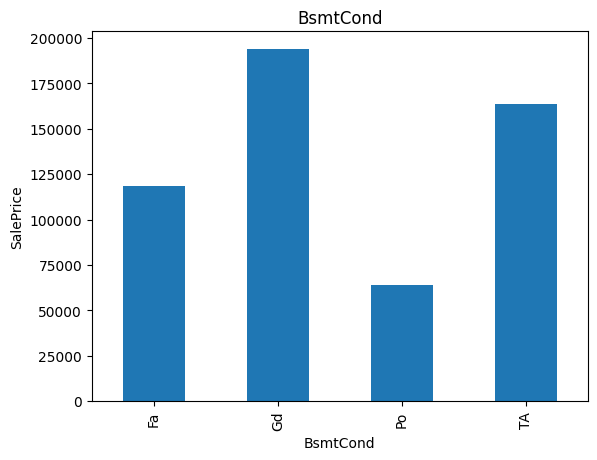

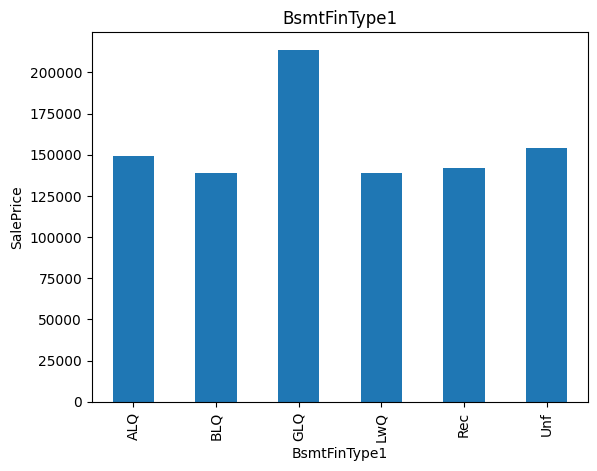

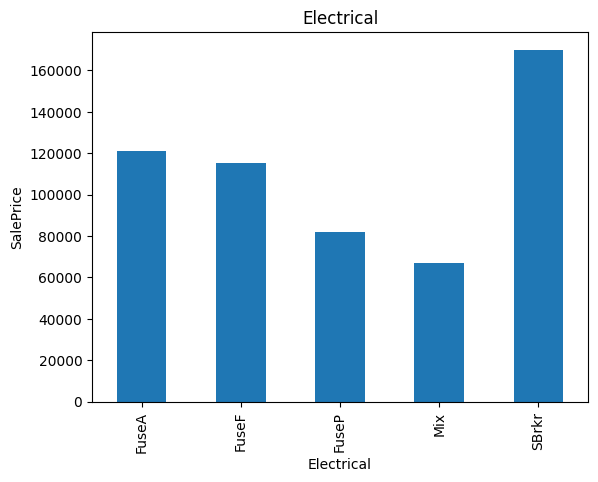

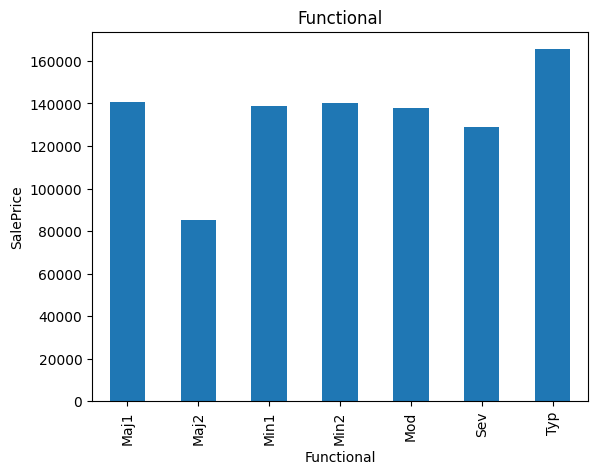

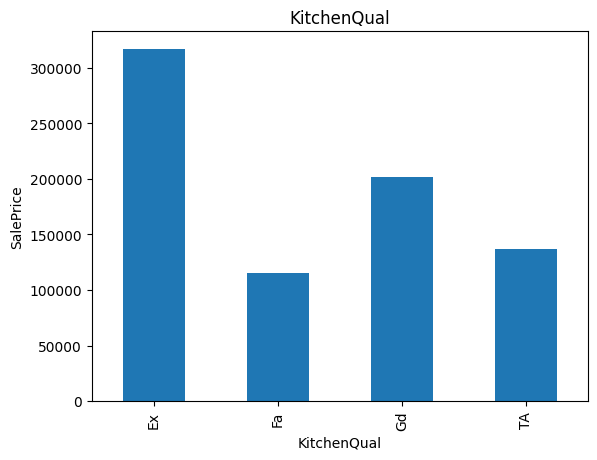

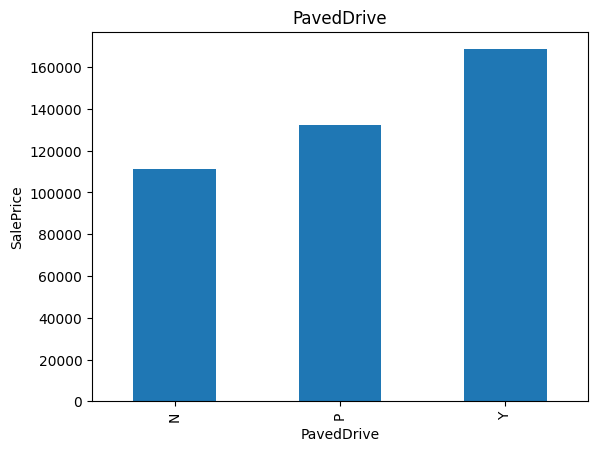

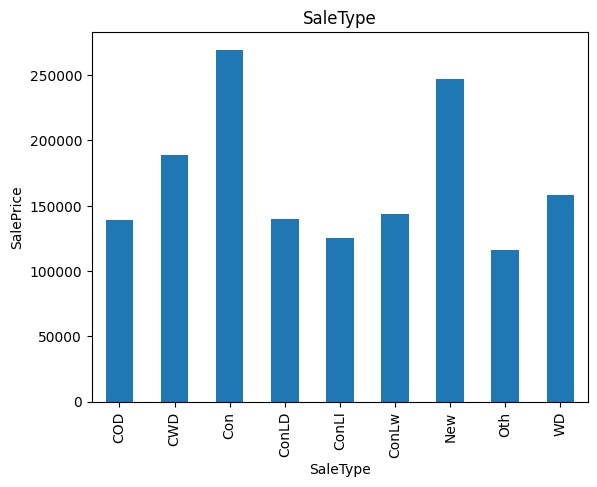

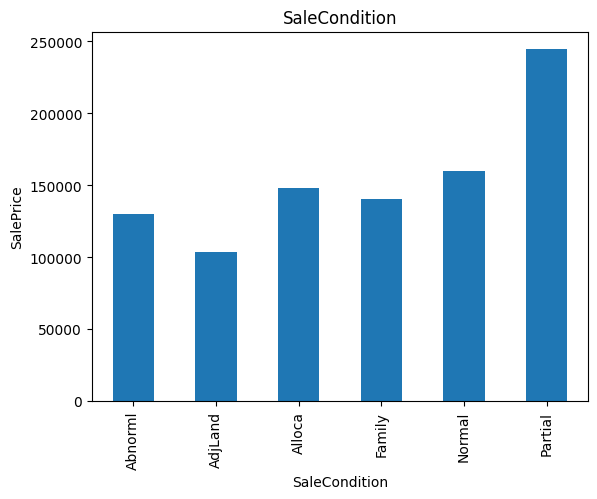

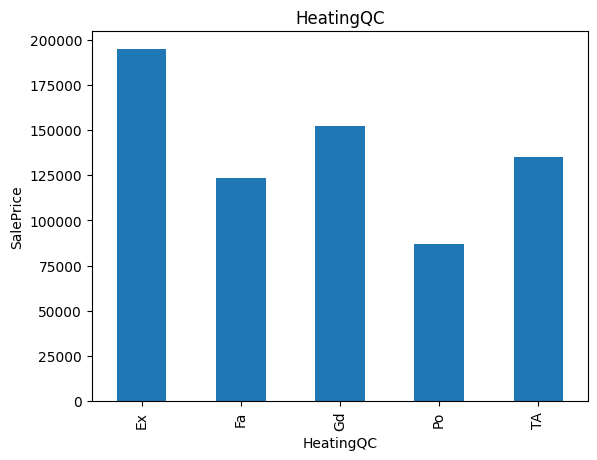

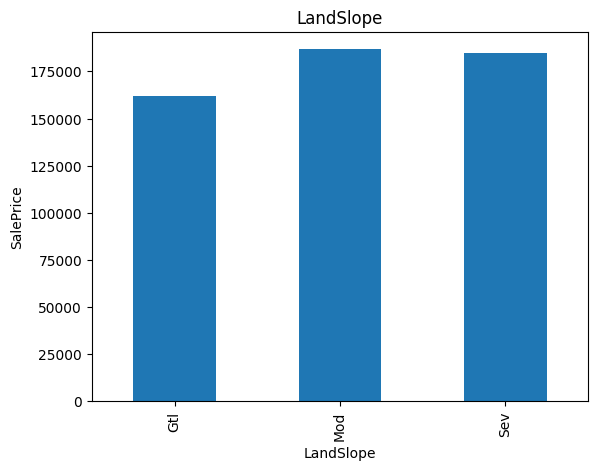

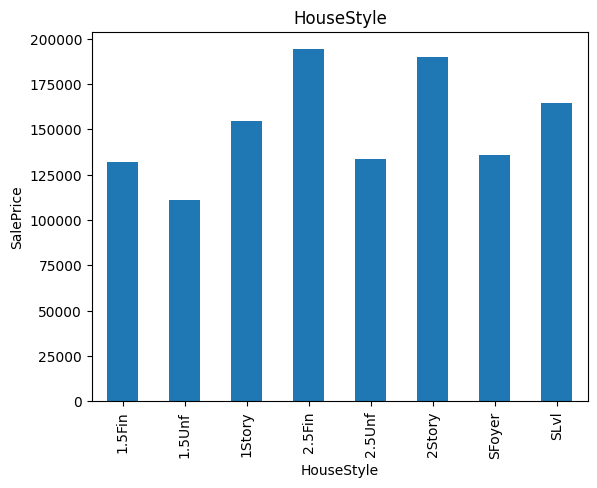

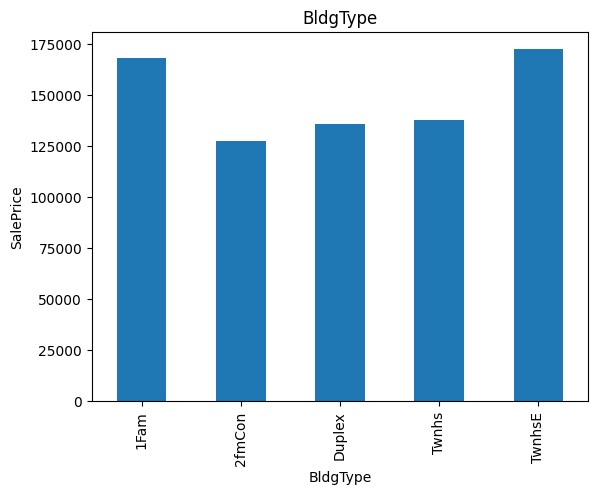

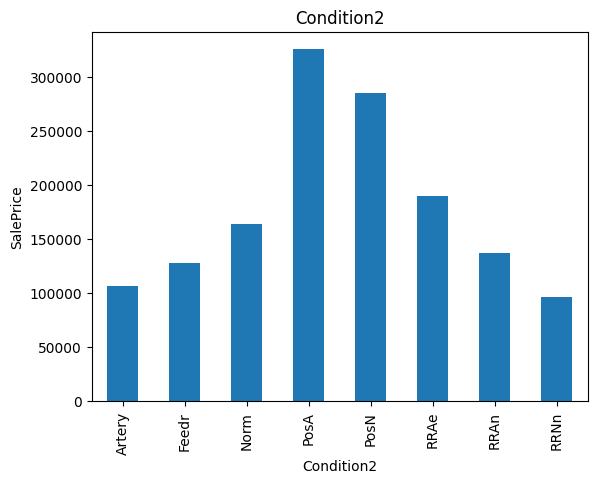

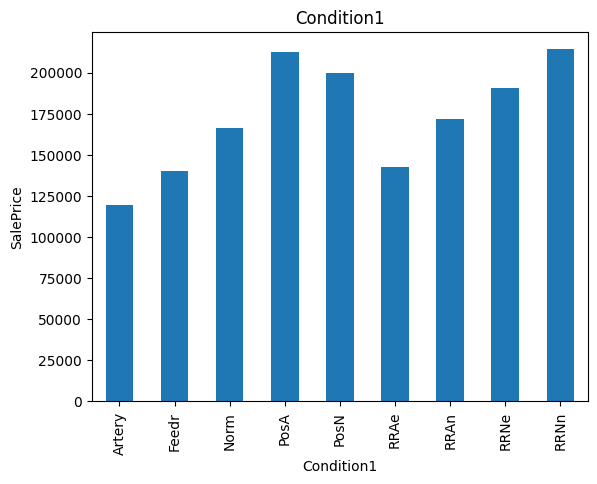

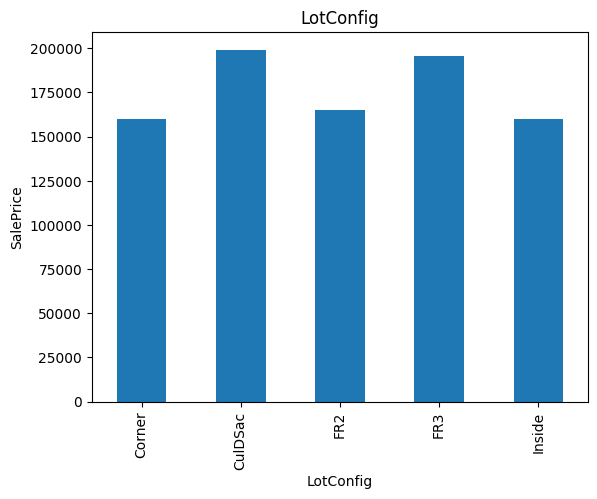

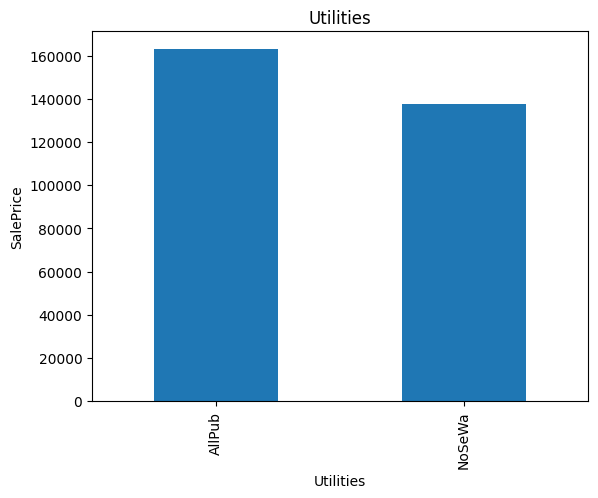

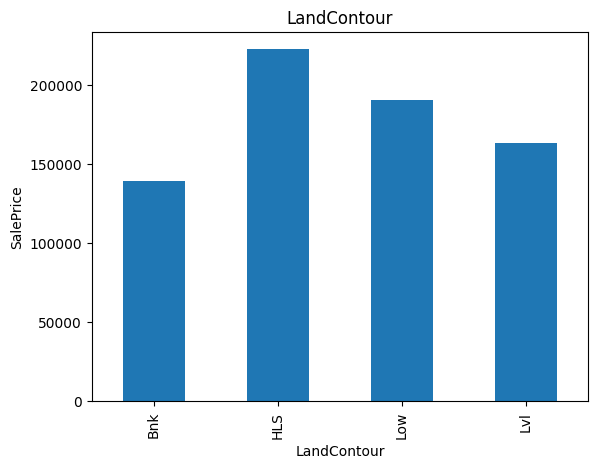

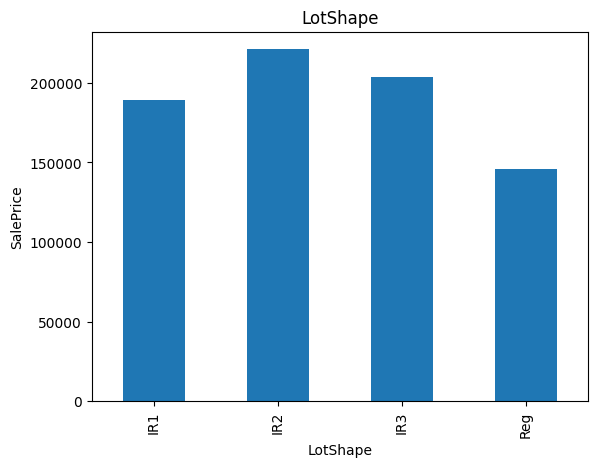

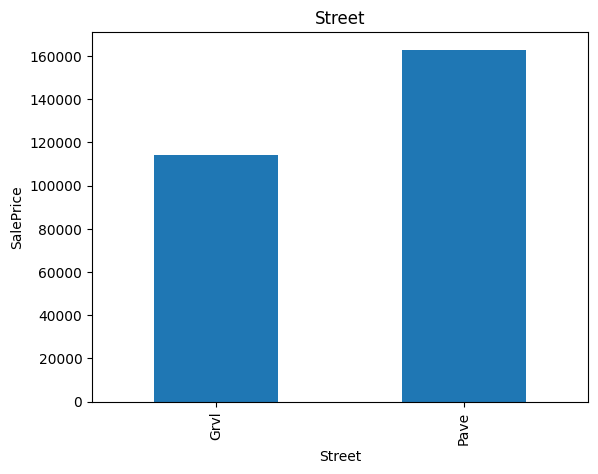

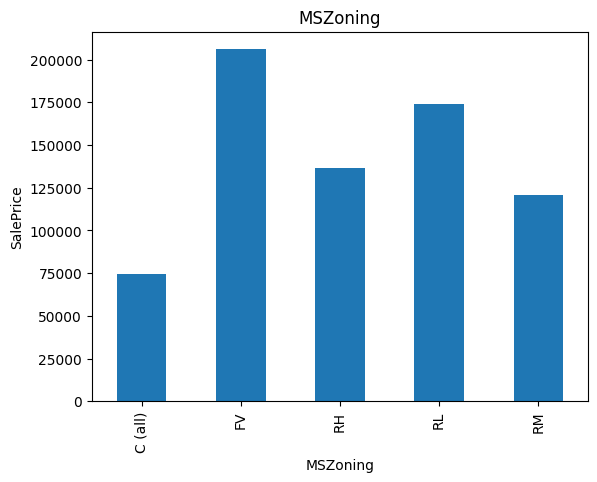

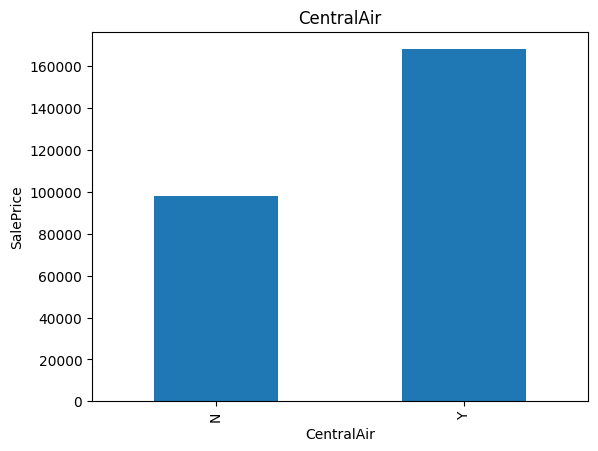

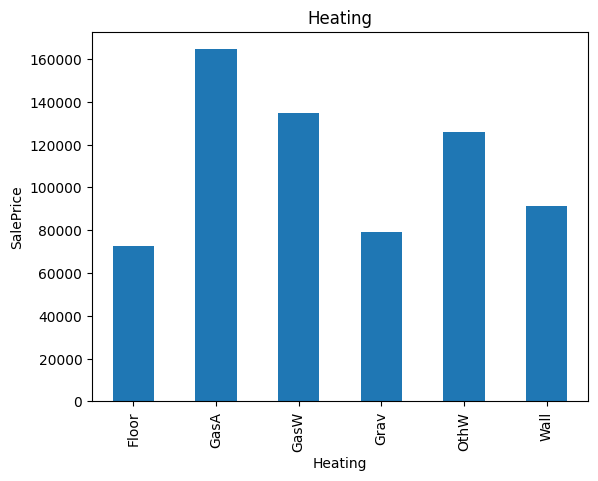

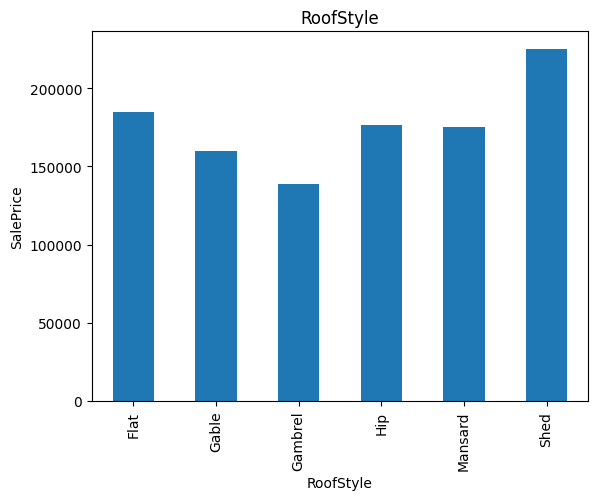

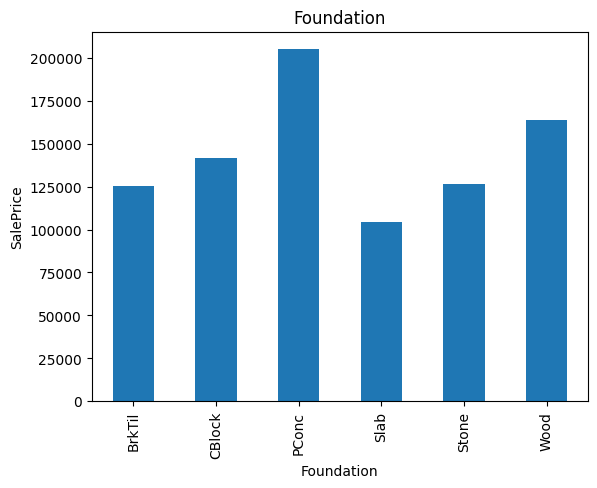

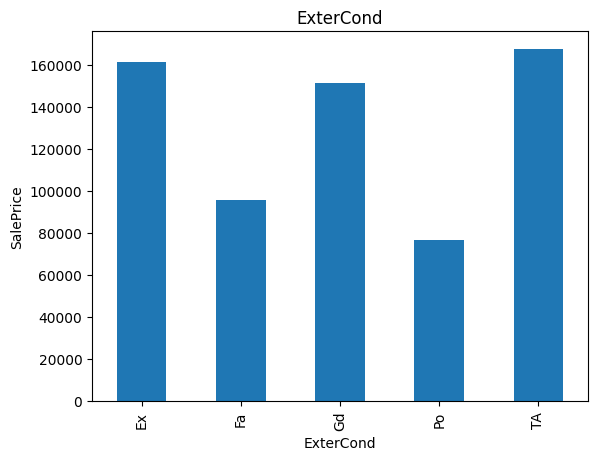

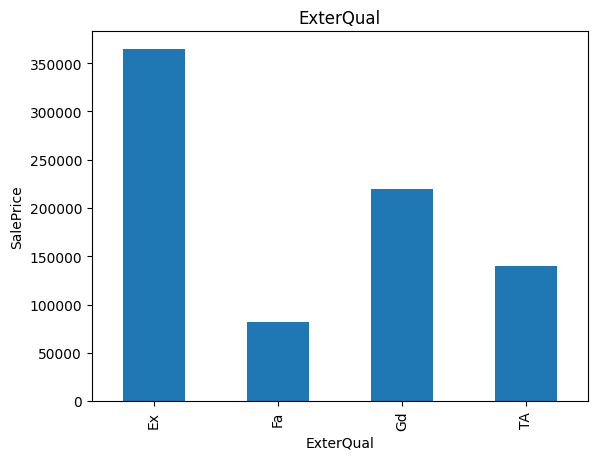

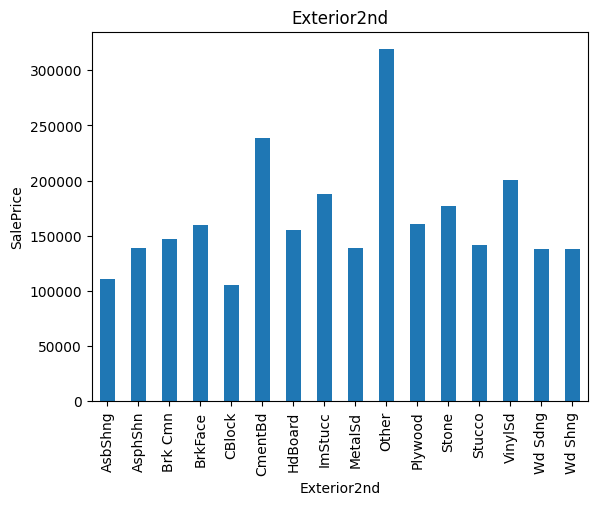

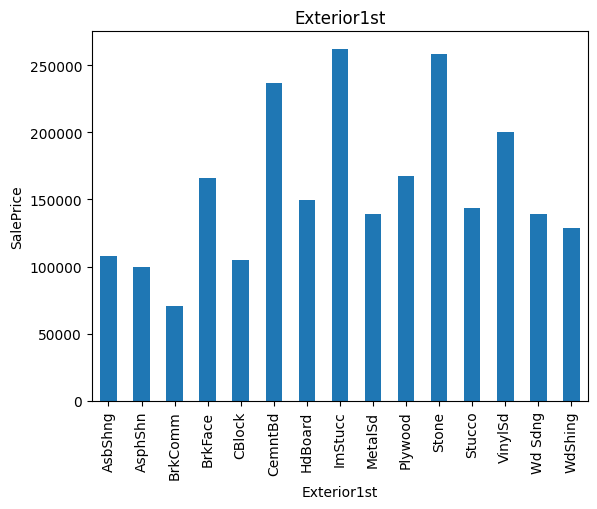

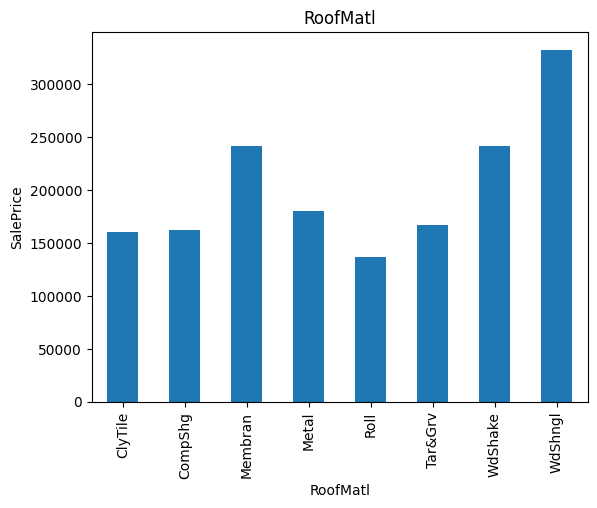

In [27]:
discrete_feature=[feature for feature in CATEGORICAL if len(train_data[feature].unique())<25]

for feature in discrete_feature:
    train=train_data.copy()
    train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [28]:
discrete_feature

['GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'Electrical',
 'Functional',
 'KitchenQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'HeatingQC',
 'LandSlope',
 'HouseStyle',
 'BldgType',
 'Condition2',
 'Condition1',
 'LotConfig',
 'Utilities',
 'LandContour',
 'LotShape',
 'Street',
 'MSZoning',
 'CentralAir',
 'Heating',
 'RoofStyle',
 'Foundation',
 'ExterCond',
 'ExterQual',
 'Exterior2nd',
 'Exterior1st',
 'RoofMatl']

In [29]:
len(discrete_feature)

36

C:\Users\SUSHMITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUSHMITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


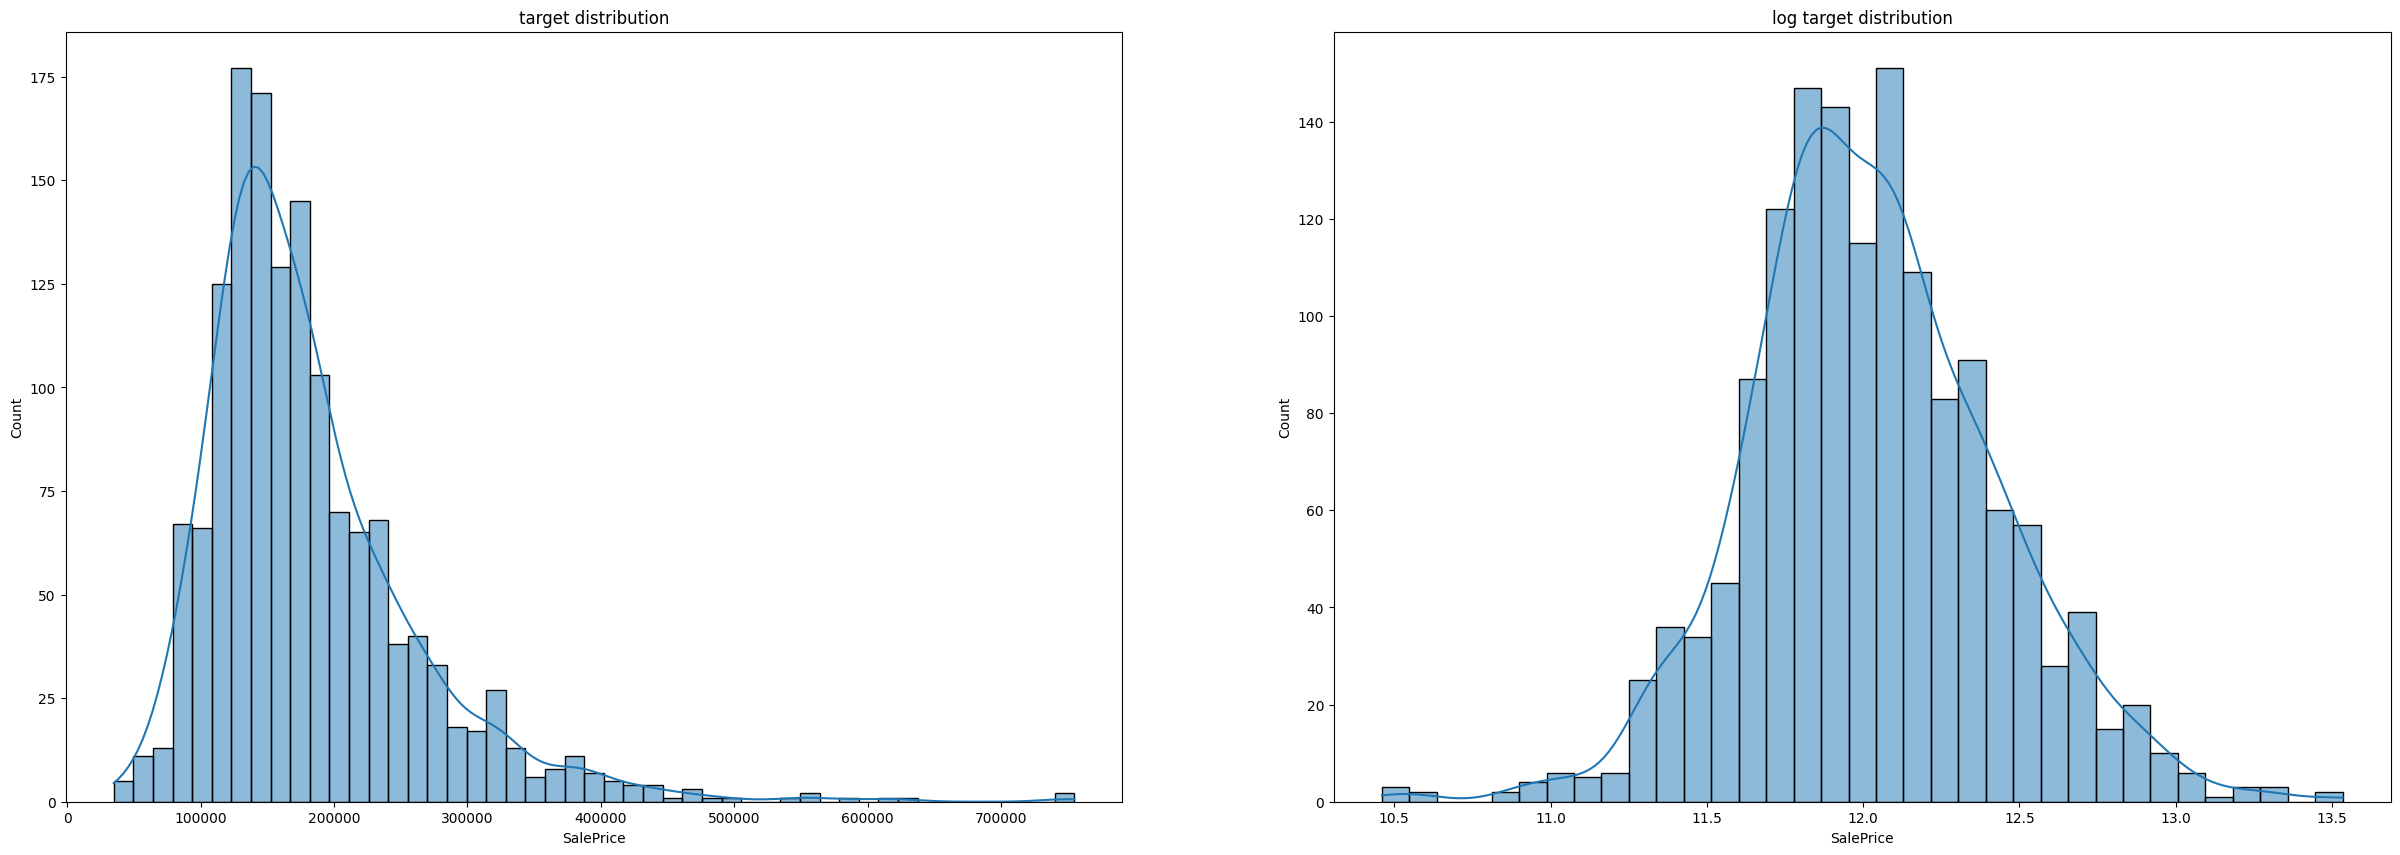

In [31]:
target = train_data['SalePrice']

plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.title('target distribution')
sns.histplot(target, kde=True)

plt.subplot(1, 2, 2)
plt.title('log target distribution')
sns.histplot(np.log(target), kde=True)
plt.show()

In [37]:
y = train_data['SalePrice']
X = train_data.drop('SalePrice', axis=1)
X = X.drop('Id', axis=1)

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
train_data[CATEGORICAL] = train_data[CATEGORICAL].astype('category')
df_encoded = pd.get_dummies(train_data)

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)

xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
preds = xg_reg.predict(X_test)

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 25708.843039
